<a href="https://colab.research.google.com/github/anelglvz/Matematicas_Ciencia_Datos/blob/main/%C3%81lgebra/Image_Denoising/Image_Denoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contexto

El ruido en las im√°genes est√° constituido por variaciones aleatorias en el brillo o los colores en una imagen. El ruido se crea en la imagen por el modo en que es capturada (variaci√≥n de la luz, calidad de la c√°mara, sensores de imagen), hasta ruido introducido por el modo en que es almacenada la imagen.

# Funciones a utilizar (para comparativos)

- PSNR(Peak Signal-to-Noise Ratio)

PSNR es la raz√≥n entre el valor m√°ximo de una se√±al y el poder de ruido que afecta la fidelidad de la representaci√≥n.

PSNR (en decibeles) se define como:

<center> <img src='imgs\psnr.svg'> </center>

Donde MSE es el error cuadratico medio entre una imagen inicial monocrom√°tica y una aproximaci√≥n que tiene ruido.

- SSIM (Structural Similarity)

Este m√©todo est√° mas interesado en utilizar la idea de que los pixeles son fuertemente interdependientes (especialmente de sus vecinos cercanos). Utiliza m√°scaras de iluminaci√≥n y de contraste.

<center> <img src='imgs\SSIM.svg'> </center>

donde 1 indica similitud perfecta, 0 indica que no hay similitud y -1 indica anticorrelaci√≥n perfecta.

Obtenido de https://github.com/Gaurav-Pande/Image-Denoising

In [ ]:
!pip3 install scikit-image

In [1]:
import skimage

In [2]:
# Revisamos la versi√≥n de skimage
skimage.__version__

'0.24.0'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import skimage as ski
from skimage.metrics import structural_similarity as ssim      # Antes de la version 0.18 de skimage, estaban en submodulo measure
from skimage.metrics import peak_signal_noise_ratio as psnr    # Antes de la version 0.18 de skimage, estaban en submodulo measure

In [4]:
# Imagen paa pruebas
img_filename = './cameraman.tif'
img_prueba = plt.imread(img_filename).astype(dtype=float)

In [5]:
img_prueba

array([[156., 159., 158., ..., 151., 152., 152.],
       [160., 154., 157., ..., 154., 155., 153.],
       [156., 159., 158., ..., 151., 152., 152.],
       ...,
       [114., 132., 123., ..., 135., 137., 114.],
       [121., 126., 130., ..., 133., 130., 113.],
       [121., 126., 130., ..., 133., 130., 113.]])

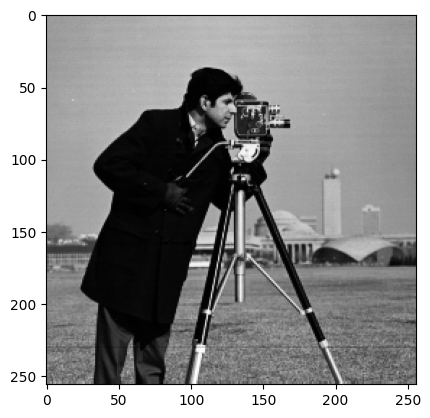

In [6]:
plt.imshow(img_prueba, cmap='gray')
plt.show()

### Explicaci√≥n de la funci√≥n getpca(X)
La funci√≥n getpca recibe un solo argumento 
ùëã, 
que es una matriz de 
ùëÄ
√ó
ùëÅ
donde 
ùëÄ
 es el n√∫mero de caracter√≠sticas (variables) y 
ùëÅ
 es el n√∫mero de muestras (observaciones).

**Paso 1: Calculamos la media**
Se calcula la media de 
ùëã
 a lo largo del eje 1 (media por caracter√≠stica), lo que da como resultado un vector columna 
ùëö
ùë•
 de forma 
ùëÄ
√ó
1
.

**Paso 2: Centramos los datos** Se resta el vector de media 
ùëö
ùë•
 de cada columna de 
ùëã
, centrando as√≠ los datos en torno al origen (media cero).

**Paso 3: Calculamos la matriz de covarianza y obtenemos los valores propios** Se calcula la matriz de covarianza CovX como el producto punto de 
ùëã 
con su transpuesta, normalizada por 
ùëÅ
‚àí
1
 (correcci√≥n de Bessel).

**Paso 4: Ordenamos los valores y vectores propios** Lo hacemos de forma ascendente

**Paso 5: Proyectamos en el nuevo espacio** Los datos centrados 
ùëã
 se proyectan en la nueva base definida por los vectores propios 
ùëÉ
 lo que resulta en 
ùëå
, que contiene los componentes principales.

In [7]:
def getpca(X):
    # %X: MxN matrix
    # %Y: Y=P*X
    # %P: matriz de transformaci√≥n
    # %V: los eigenvalores ordenados en la salida

    [M, N] = X.shape

    mx = (np.mean(X, axis=1)).reshape((M, 1))

    X = X - mx

    CovX = (X @ X.T) / (N-1)
    [V, P]= np.linalg.eig(CovX) # V son los eigenvalores, P, los eigenvectores

    V_minus = -1 * V
    ind = np.argsort(V_minus, axis=0)

    V = V[ind]
    P = P[:, ind]

    P = P.T
    Y = np.matmul(P, X)
    # Y = P @ X

    # Pt @ Y = X
    # Pt = U
    # Y = D @ Vt
    # U @ D @ Vt = X
    # Y son los componentes principales
    # P son los loadings

    return [Y, P, V, mx]

In [8]:
np.set_printoptions(suppress=True)
getpca(img_prueba)[2]

array([388285.54040314, 118509.67349474,  38871.51697632,  35096.35871114,
        23002.87407307,  20872.70588632,  14032.75383728,  12079.67014452,
         9835.0556509 ,   9414.24156558,   9041.44847998,   8531.46283866,
         8103.26020917,   6619.94332649,   5779.51969304,   5352.2338874 ,
         4930.62828759,   4034.61222204,   3845.25099736,   3578.55477539,
         3227.53550401,   2616.01335672,   2501.91741834,   2460.00557362,
         2264.46314422,   2157.15380446,   1922.75337982,   1801.94264422,
         1764.08349705,   1629.01834553,   1522.43584152,   1500.81085376,
         1355.24536552,   1289.28847294,   1194.54314056,   1151.56910108,
         1110.51467214,   1083.73927634,   1020.67302764,    974.54023741,
          905.86921401,    866.17004808,    842.29603741,    803.00279715,
          768.54347668,    715.6881513 ,    703.3196487 ,    688.77422321,
          653.88730379,    611.26873386,    569.80628035,    558.27803392,
          537.4142182 ,  

In [9]:
# Funci√≥n utilizada para 'inflar' mis im√°genes en blanco y negro
def blow_gray(B):
    [n, m] = B.shape
    n = 2 * n
    m = 2 * m
    A = np.zeros((n,m))

    A[0:n:2, 0:m:2] = B
    A[0:n:2, 1:m:2] = B
    A[1:n:2, 0:m:2] = B
    A[1:n:2, 1:m:2] = B

    return A

La funci√≥n **LPG_new** realiza un agrupamiento local de p√≠xeles. Su objetivo es encontrar un conjunto de vectores de muestras (o p√≠xeles) que son m√°s similares al vector central en un bloque de entrenamiento definido alrededor de una posici√≥n dada.

**Paso 1: Obtener dimensiones** Se obtienen las dimensiones de la matriz auxiliar 
ùêº
 y se almacena el n√∫mero de columnas de 
ùëã
 en f2, que representa la cantidad de caracter√≠sticas (o dimensiones) de cada vector de muestra.

**Paso 2: Definir el bloque variable** 
- rmin: Borde superior (fila m√≠nima)
- rmax: Borde inferior (fila m√°xima)
- cmin: Borde izquierdo (columna m√≠nima)
- cmax: Borde derecho (columna m√°xima)

**Paso 3: Obtenemos los √≠ndices de los Vectores en el Bloque de Entrenamiento** Se extraen los √≠ndices de los vectores en el bloque de entrenamiento usando la matriz auxiliar 
ùêº
 en los rangos definidos. Luego, se aplana la matriz de √≠ndices para tener una lista unidimensional de √≠ndices.

**Paso 4: Obtenemos vectores del training block y del centro del bloque**

**Paso 5: Calculamos las distancias entre vectores** Se calcula la distancia al cuadrado entre el primer elemento de cada vector en 
ùêµ
 y el primer elemento del vector central 
ùë£
. Esto se hace para cada dimensi√≥n del vector, y se inicializa la matriz de distancias.


**Paso 6: Calculamos las distancias para todas las dimensiones**

**Paso 7: Promediamos las distancias, ordenamos y regresamos los vectores con menor distancia**

In [10]:
def LPG_new(X, row, col, off, nv, S, I):
    """Local Pixel Grouping

    X: Matriz de MxN que tiene los "sample vectors" de x_v como vectores fila
    row: fila del centro del block variable
    col: columna del centro del block variable
    off: Nos da la posicion del vector en el centro del training block
    nv: N√∫mero m√≠nimo de vectores a regresar de V.
    S: Mitad del tama√±o del training block
    I: Matriz auxiliar para recuperar los vectores correpondientes a cada block variable
    """
    [N, M] = I.shape
    f2 = X.shape[1]

    # borde superior del variable block
    rmin = max(row - S, 0)
    # borde inferior
    rmax = min(row + S + 1, N)
    # borde izquierdo
    cmin = max(col - S, 0)
    # Borde derecho
    cmax = min(col + S + 1, M)

    # print("rmin, rmax, cmin, cmax: ", rmin, rmax, cmin, cmax)
    # Obtenemos los √≠ndices de los vectores en el training block
    idx = I[rmin: rmax, cmin: cmax]
    idx = (idx.T).flatten()

    # Obtiene todas las vectores dentro del training block
    B = X[idx,:]
    # Vector del centro del bloque
    v = X[off,:]

    # calculamos la distancia entrada a entrada de cada variable block respecto a la del vector del centro
    dis = ((B[:, 0] - v[0])**2)
    dis = dis.reshape((dis.shape[0], 1))

    for k in range(1, f2):
        # print("k: ", k)
        # k = int(k/S)
        dis_partial = ((B[:, k] - v[k])**2)
        dis_partial = dis_partial.reshape((dis_partial.shape[0], 1))
        dis = dis + dis_partial

    dis = dis/f2
    # Se ordenan de menor a mayor
    ind = np.argsort(dis, axis=0)
    # Se obtiene los nv vectores con menor distancia
    indc = idx[ind[0:nv]]

    return indc

In [11]:
def dim_reduction(X):
    # Obtenemos el n√∫mero de filas
    n = X.shape[0]
    # Calcula el n√∫mero de componentes principales a usar (40% de n)
    n = math.floor(n * 0.4)
    # Llamamos getpca
    [coe, P, V, mX] = getpca(X)
    # Proyectamos los datos originales X en el espacio reducidp. 
    Y = P[0 : n, :] @ X
    return Y

El siguiente c√≥digo implementa un algoritmo de eliminaci√≥n de ruido en im√°genes utilizando un **m√©todo de agrupamiento de p√≠xeles locales (LPG)** y un **An√°lisis de Componentes Principales (PCA).**

<img src='./imgs/pipeline.png'/>

**Limitaciones:**
- Se pide como entrada un nivel estimado de ruido
- La computaci√≥n es bastante intensiva

**Entradas:**
- noise_img: Imagen con ruido.
- orig_img: Imagen original (sin ruido).
- std: Desviaci√≥n est√°ndar del ruido.
- profile: Modo de procesamiento ('fast' o 'normal').
- K: Par√°metro para recortar los bordes de la imagen.

**Algoritmo**

**Inicializaci√≥n**

Determina el tama√±o de los bloques de p√≠xeles que se utilizar√°n para el procesamiento basado en el perfil y las dimensiones de las im√°genes.

**Creaci√≥n de Bloque**

Se generan bloques de p√≠xeles de la imagen ruidosa para su posterior an√°lisis. Estos bloques son arreglos de p√≠xeles que se consideran "vecinos" y se utilizan para estimar el valor del p√≠xel central.

**Reducci√≥n de Dimensionalidad**

Dependiendo del perfil, se puede reducir la dimensionalidad de los bloques utilizando PCA para facilitar el procesamiento.

**Proceso de Denoising**

Para cada posible p√≠xel central, se identifican los bloques m√°s cercanos utilizando la funci√≥n LPG_new, que agrupa p√≠xeles similares.
Se aplica PCA a estos bloques para encontrar componentes principales y se ajustan los valores de los p√≠xeles utilizando la varianza y los pesos calculados.
Se reconstruye la imagen filtrada (dI) a partir de los bloques procesados.

**Normalizaci√≥n**

La imagen resultante se normaliza para evitar valores fuera del rango de intensidad aceptable.

**Refinamiento**

Se repite el proceso de eliminaci√≥n de ruido para refinar a√∫n m√°s la imagen.

In [22]:
# LPG de local pixel grouping
def LPGPCA_denoising(noise_img, orig_img, std, profile, K):
    s = 2
    if profile == 'fast':
        s = 2
    elif profile == 'normal':
        s = 1

    [n, m] = orig_img.shape
    [h, w] = noise_img.shape

    #-----------------------------------------------------------------
    # First stage: denoising
    #-----------------------------------------------------------------

    v2 = std**2
    # training block(2k + 1) * (2k + 1)
    S = 20
    # variable block(2t + 1) * (2t + 1)
    t = 3
    # nblk representa el n√∫mero m√≠nimo de vectores (o bloques) similares que se desean recuperar para cada p√≠xel central
    nblk = 250
    b = 2 * t + 1
    b2 = b * b

    k = 0
    # N√∫mero de filas que tienen pixeles a eliminar ruido
    N = h - b + 1
    # N√∫mero de columnas que tienen pixeles a eliminar ruido
    M = w - b + 1
    # Cantidad de pixeles que pueden ser centro de "variable block"
    L = N * M
    r = np.arange(0, N, s)
    # ¬øLa √∫ltima entrada de r es menor a N-1?
    if r[-1] < (N - 1):
        r = np.hstack((r, np.arange(r[-1], N, 1)))

    c = np.arange(0, M, s)
    if c[-1] < (M - 1):
        c = np.hstack((c, np.arange(c[-1], M, 1)))

    # Matriz para alojar todos los posibles bloques
    X = np.zeros((b*b, L))

    # i recorre la matriz de arriba a abajo
    # j de izquierda a derecha
    # Cuando i,j = 0, se llena la primera entrada de todos los posibles bloques (variable block) y avanza para llenar las dem√°s
    for i in range(b):
        for j in range(b):
            blk = noise_img[i : (h - b + i + 1), j : (w - b + j + 1)]
            blk = (blk.T).flatten()
            X[k, :] = blk
            k = k + 1

    if profile == 'fast':
        X1 = dim_reduction(X)
        XT = X1.T
    else:
        XT = X.T

    # Matriz auxiliar para recuperar los vectores correspondientes a cada variable block
    I = np.arange(L)
    I = (I.reshape((M, N))).T

    N1 = len(r)
    M1 = len(c)
    L = N1 * M1
    Y = np.zeros((b2, L))

    # Para cada fila en la que puede haber un pixel a quitar ruido (centro del variable block )
    for i in range(N1):
        # Para cada columna en la que puede haber un pixel a quitar ruido (centro del variable block)
        for j in range(M1):
            # para profile = 'normal', se selecciona el centro de cada variable block,
            # de izquierda a derecha, de arriba a abajo
            row = r[i]
            col = c[j]
            # El √≠ndice del vector en X, correpondiente al centro  del variable block
            off = (col * N) + row
            off1 = (j * N1) + i

            # Se obtienen los √≠ndices de los nblk-th vectores m√°s cercanos
            indc = LPG_new(XT, row, col, off, nblk, S, I)
            indc = indc.flatten()
            # PCA sobre los vectores m√°s cercanos al 'pixel to be denoised'
            [coe, P, V, mX] = getpca(X[:, indc])
            # Varianza de Y = coe
            py = np.mean(coe**2, axis=1)
            # Se transforma a vector columna
            py = py.reshape((py.shape[0], 1))
            px = np.maximum(np.zeros(py.shape), py - v2)
            wei = px/py
            partial = ((coe[:, 0]).T * (wei.T)).T
            partial2 = P.T @ partial
            partial3 = mX[:, 0]
            partial3 = partial3.reshape((partial3.shape[0], 1))

            Y[:, off1] = (partial2 + partial3)[:, 0]


    # Fin: Output the processed image
    dI = np.zeros((h, w))
    im_wei = np.zeros((h, w))
    k = 0
    for i in range(b):
        for j in range(b):
            rv, cv = np.meshgrid(r+i, c+j)
            dI[rv, cv] = dI[rv, cv] + (Y[k, :].T).reshape((N1, M1))
            im_wei[rv, cv] = im_wei[rv, cv] + 1
            k = k + 1

    print("dI.max: ", np.max(dI))
    print("dI.min: ", np.min(dI))
    print("imwei.max: ", np.max(im_wei))
    print("imwei.min: ", np.min(im_wei))

    eps = 1e-23
    dI = dI/(im_wei + eps)

    print("dI.max: ", np.max(dI))
    print("dI.min: ", np.min(dI))

    psnr_1 = 0
    ssim_1 = 0

    plt.imshow(dI, cmap='gray')
    plt.title('primer paso procesamiento')
    plt.show()

    row, col = orig_img.shape
    orig_img_crop = orig_img.astype(dtype=int)
    dI_crop = dI.astype(dtype=int)
    psnr_1 = psnr(orig_img_crop, dI_crop)
    ssim_1 = ssim(orig_img_crop, dI_crop)

    dif = dI[(K) : (n - K), (K) : (m - K)] - noise_img[(K) : (n - K), (K) : (m - K)]
    print ("mean diff: ", np.mean(dif**2))
    vd = std**2 - np.mean(dif**2)
    v1 = math.sqrt(abs(vd))
    print ("v1: ", v1)

    
    #-----------------------------------------------------------------
    # The second stage: refinement
    #-----------------------------------------------------------------

    psnr_2 = 0
    ssim_2 = 0

    noise_img = dI
    v = v1 * 0.36
    v2 = v**2

    k = 0
    N = h - b + 1
    M = w - b + 1
    L = N * M
    r = np.arange(0, N, s)
    if r[-1] < (N - 1):
        r = np.hstack((r, np.arange(r[-1], N, 1)))

    c = np.arange(0, M, s)
    if c[-1] < (M - 1):
        c = np.hstack((c, np.arange(c[-1], M, 1)))

    X = np.zeros((b*b, L))

    for i in range(b):
        for j in range(b):
            blk = noise_img[i : (h - b + i + 1), j : (w - b + j + 1)]
            blk = (blk.T).flatten()
            X[k, :] = blk
            k = k + 1

    if profile == 'fast':
        X1 = dim_reduction(X)
        XT = X1.T
    else:
        XT = X.T

    I = np.arange(L)
    I = (I.reshape((M, N))).T

    N1 = len(r)
    M1 = len(c)
    L = N1 * M1
    Y = np.zeros((b2, L))

    for i in range(N1):
        for j in range(M1):
            row = r[i]
            col = c[j]
            off = (col * N) + row
            off1 = (j * N1) + i

            indc = LPG_new(XT, row, col, off, nblk, S, I)
            indc = indc.flatten()
            [coe, P, V, mX] = getpca(X[:, indc])
            py = np.mean(coe**2, axis=1)
            py = py.reshape((py.shape[0], 1))
            px = np.maximum(np.zeros(py.shape), py - v2)
            wei = px/py
            partial = ((coe[:, 0]).T * (wei.T)).T
            partial2 = P.T @ partial
            partial3 = mX[:, 0]
            partial3 = partial3.reshape((partial3.shape[0], 1))

            Y[:, off1] = (partial2 + partial3)[:, 0]


    # Output the processed image
    dI = np.zeros((h, w))
    im_wei = np.zeros((h, w))
    k = 0

    for i in range(b):
        for j in range(b):
            rv, cv = np.meshgrid(r+i, c+j)
            dI[rv, cv] = dI[rv, cv] + (Y[k, :].T).reshape((N1, M1))
            im_wei[rv, cv] = im_wei[rv, cv] + 1
            k = k + 1

    eps = 1e-23
    dI = dI/(im_wei + eps)

    row, col = orig_img.shape

    print("dI2.max: ", np.max(dI))
    print("dI2.min: ", np.min(dI))

    orig_img_crop = orig_img.astype(dtype=int)
    dI_crop = dI.astype(dtype=int)

    # Comparaciones
    psnr_2 = psnr(orig_img_crop, dI_crop)
    ssim_2 = ssim(orig_img_crop, dI_crop)

    plt.imshow(dI, cmap='gray')
    plt.title('Output de imagen procesada')
    plt.show()

    d_im = dI[K:n-K, K:m-K]

    return [d_im, psnr_1, ssim_1, psnr_2, ssim_2]

<img src='./imgs/PCA a la inversa.png'>

orig_img.shape:  (256, 256)
orig_img.max:  253.0
orig_img.min:  7.0


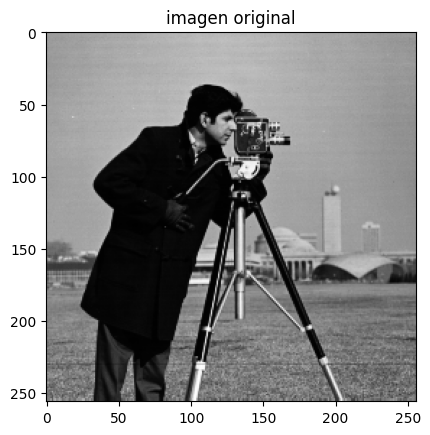

noise_img.shape:  (256, 256)
noise_img.max:  301.43925395864215
noise_img.min:  -71.84859949192926


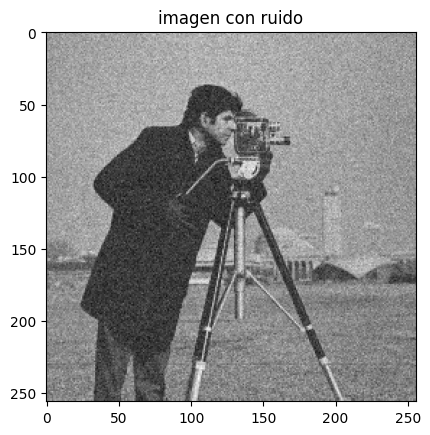

dI.max:  13261.221033512073
dI.min:  -904.0621773779682
imwei.max:  49.0
imwei.min:  1.0
dI.max:  270.63716394922596
dI.min:  -18.450248517917718


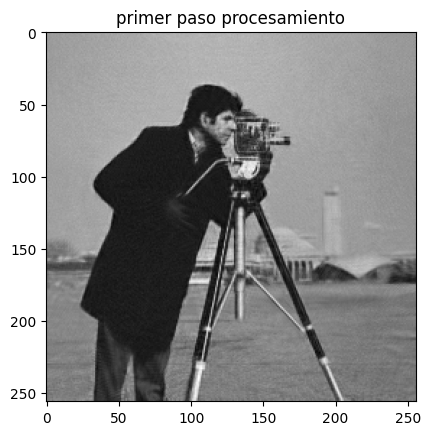

mean diff:  282.3525070249642
v1:  10.846542904309915


/var/folders/_2/ssn9p4gn1zq96vptrk6db0940000gn/T/ipykernel_7463/2200386134.py:131: UserWarning: Setting data_range based on im1.dtype. data_range = 18446744073709551616. Please specify data_range explicitly to avoid mistakes.
  ssim_1 = ssim(orig_img_crop, dI_crop)


dI2.max:  270.16426056230614
dI2.min:  -15.612025583725053


/var/folders/_2/ssn9p4gn1zq96vptrk6db0940000gn/T/ipykernel_7463/2200386134.py:233: UserWarning: Setting data_range based on im1.dtype. data_range = 18446744073709551616. Please specify data_range explicitly to avoid mistakes.
  ssim_2 = ssim(orig_img_crop, dI_crop)


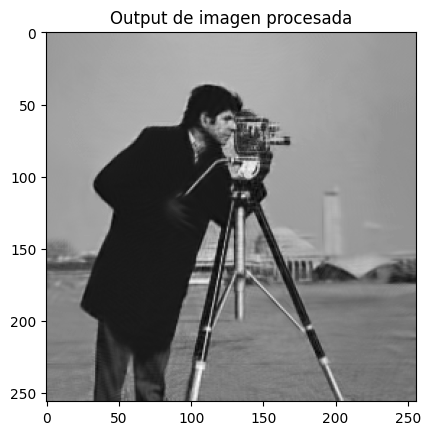

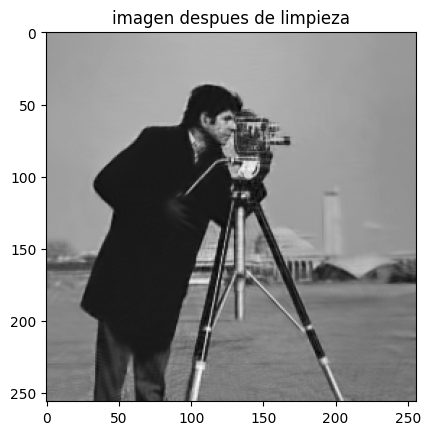

psnr1:  360.6470439203153
ssim1:  1.0
psnr2:  360.853881220485
ssim2:  1.0


In [23]:
profile = 'normal'
std = 20
img_filename = './cameraman.tif'
orig_img = plt.imread(img_filename).astype(dtype=float)
print("orig_img.shape: ", orig_img.shape)
print("orig_img.max: ", np.max(orig_img))
print("orig_img.min: ", np.min(orig_img))
plt.imshow(orig_img, cmap='gray')
plt.title('imagen original')
plt.show()

seed = 0
random.seed(seed)

noise = np.random.normal(size=(orig_img.shape))
noise = noise/np.sqrt(np.mean(noise**2))
noise_img = orig_img + (std * noise)
print("noise_img.shape: ", noise_img.shape)
print("noise_img.max: ", np.max(noise_img))
print("noise_img.min: ", np.min(noise_img))
plt.imshow(noise_img, cmap='gray')
plt.title('imagen con ruido')
plt.show()

#El ancho de los l√≠mites excluidos
bound_exclude_width = 0

[denoise_img, psnr1, ssim1, psnr2, ssim2] =\
    LPGPCA_denoising(noise_img, orig_img, std, profile, bound_exclude_width)

plt.imshow(denoise_img, cmap='gray')
plt.title('imagen despues de limpieza')
plt.show()

print("psnr1: ", psnr1)
print("ssim1: ", ssim1)
print("psnr2: ", psnr2)
print("ssim2: ", ssim2)


- **dI.max/min:** Indican los valores extremos de intensidad acumulados y normalizados en la imagen denoised.
- **imwei.max/min:** Representan la cantidad de contribuciones de bloques a cada p√≠xel, asegurando que cada p√≠xel haya sido procesado al menos una vez.
- **mean diff:** Error cuadr√°tico medio (Mean Squared Error, MSE) entre la imagen denoised (dI) y la imagen ruidosa original (noise_img).
- **v1:** Estimaci√≥n refinada de la desviaci√≥n est√°ndar del ruido residual.

orig_img.shape:  (256, 256)
orig_img.max:  253.0
orig_img.min:  7.0


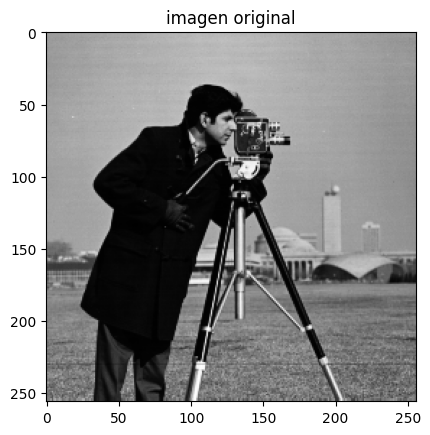

noise_img.shape:  (256, 256)
noise_img.max:  302.9408428023796
noise_img.min:  -57.772028761142906


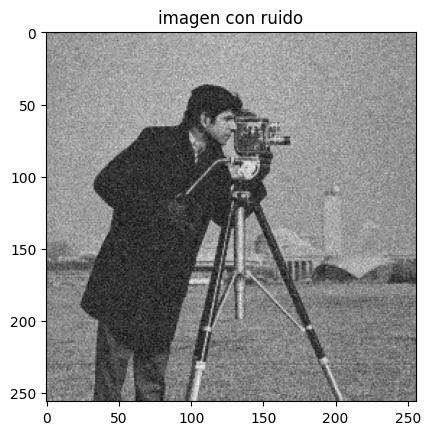

dI.max:  4182.6082589231055
dI.min:  -376.2631790422623
imwei.max:  16.0
imwei.min:  1.0
dI.max:  270.9958063286171
dI.min:  -26.286874900109158


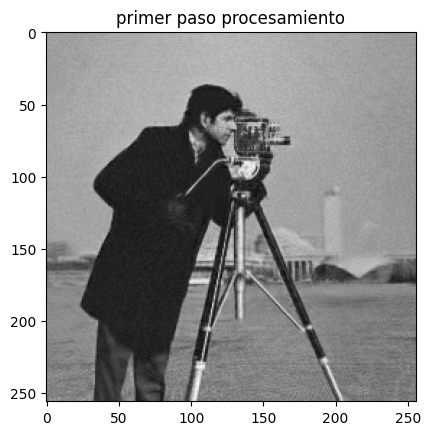

mean diff:  247.20555925695697
v1:  12.361004843581409


/var/folders/_2/ssn9p4gn1zq96vptrk6db0940000gn/T/ipykernel_7463/1380445116.py:137: UserWarning: Setting data_range based on im1.dtype. data_range = 18446744073709551616. Please specify data_range explicitly to avoid mistakes.
  ssim_1 = ssim(orig_img_crop, dI_crop)


dI2.max:  269.85643565278855
dI2.min:  -25.390713769629134


/var/folders/_2/ssn9p4gn1zq96vptrk6db0940000gn/T/ipykernel_7463/1380445116.py:239: UserWarning: Setting data_range based on im1.dtype. data_range = 18446744073709551616. Please specify data_range explicitly to avoid mistakes.
  ssim_2 = ssim(orig_img_crop, dI_crop)


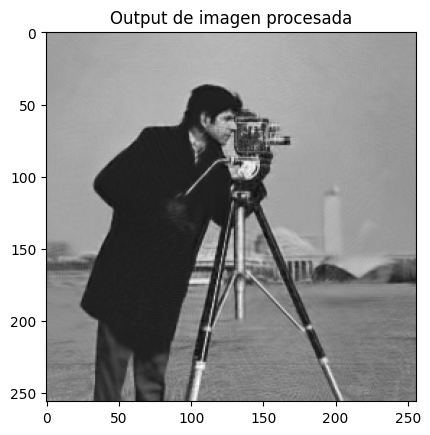

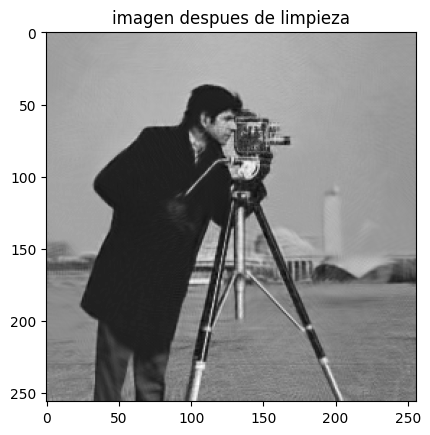

psnr1:  360.4427888593461
ssim1:  1.0
psnr2:  361.0567400734474
ssim2:  1.0


In [14]:
profile = 'fast'
std = 20
img_filename = './cameraman.tif'
orig_img = plt.imread(img_filename).astype(dtype=float)
print("orig_img.shape: ", orig_img.shape)
print("orig_img.max: ", np.max(orig_img))
print("orig_img.min: ", np.min(orig_img))
plt.imshow(orig_img, cmap='gray')
plt.title('imagen original')
plt.show()

seed = 0
random.seed(seed)

noise = np.random.normal(size=(orig_img.shape))
noise = noise/np.sqrt(np.mean(noise**2))
noise_img = orig_img + (std * noise)
print("noise_img.shape: ", noise_img.shape)
print("noise_img.max: ", np.max(noise_img))
print("noise_img.min: ", np.min(noise_img))
plt.imshow(noise_img, cmap='gray')
plt.title('imagen con ruido')
plt.show()

#El ancho de los l√≠mites excluidos (lo dejamos en 0)
bound_exclude_width = 0

[denoise_img, psnr1, ssim1, psnr2, ssim2] =\
    LPGPCA_denoising(noise_img, orig_img, std, profile, bound_exclude_width);

plt.imshow(denoise_img, cmap='gray')
plt.title('imagen despues de limpieza')
plt.show()

print("psnr1: ", psnr1)
print("ssim1: ", ssim1)
print("psnr2: ", psnr2)
print("ssim2: ", ssim2)

# Opcional: Caso a Color

In [23]:
def blow_color(B):
    [n, m, ch] = B.shape
    n = 2 * n
    m = 2 * m
    A = np.zeros((n,m,ch))

    A[0:n:2, 0:m:2, :] = B
    A[0:n:2, 1:m:2, :] = B
    A[1:n:2, 0:m:2, :] = B
    A[1:n:2, 1:m:2, :] = B

    return A

In [24]:
import PIL
import urllib

orig_img.shape:  (481, 321, 3)
orig_img.max:  255
orig_img.min:  0


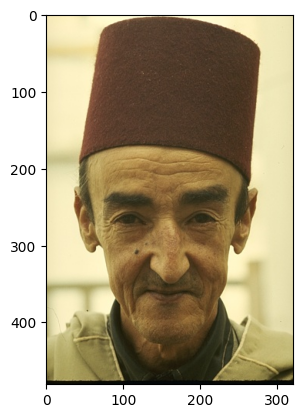

In [32]:
img_filename = './0038.png' #'0038.png'
orig_img = np.array(PIL.Image.open(img_filename))
print("orig_img.shape: ", orig_img.shape)
print("orig_img.max: ", np.max(orig_img))
print("orig_img.min: ", np.min(orig_img))
plt.imshow(orig_img)
plt.show()

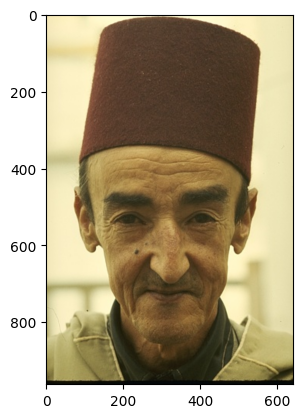

In [33]:
plt.imshow(blow_color(orig_img).astype(dtype=int))
plt.show()

In [34]:
orig_img.shape , blow_color(orig_img).shape

((481, 321, 3), (962, 642, 3))

In [35]:
from PIL import Image

In [37]:
def LPGPCA_color_denoising(noise_img, orig_img, std, profile):
    s = 4
    if profile == 'fast':
        s = 4
    elif profile == 'normal':
        s = 3

    [n, m, ch] = orig_img.shape
    [h, w, ch] = noise_img.shape

    ##############First stage denoising###############

    v2 = std**2
    # training block(2k + 1) * (2k + 1)
    S = 20
    # variable block(2t + 1) * (2t + 1)
    t = 3
    nblk = 250
    b = 2 * t + 1
    b2 = b * b

    k = 0
    N = h - b + 1
    M = w - b + 1
    L = N * M
    r = np.arange(0, N, s)
    if r[-1] < (N - 1):
        r = np.hstack((r, np.arange(r[-1], N, 1)))

    c = np.arange(0, M, s)
    if c[-1] < (M - 1):
        c = np.hstack((c, np.arange(c[-1], M, 1)))

    X = np.zeros((b*b*ch, L))

    for i in range(b):
        for j in range(b):
            blk = noise_img[i : (h - b + i + 1), j : (w - b + j + 1), 0]
            blk = (blk.T).flatten()
            X[k, :] = blk
            blk = noise_img[i : (h - b + i + 1), j : (w - b + j + 1), 1]
            blk = (blk.T).flatten()
            X[k + b2, :] = blk
            blk = noise_img[i : (h - b + i + 1), j : (w - b + j + 1), 2]
            blk = (blk.T).flatten()
            X[k + (2 * b2), :] = blk
            k = k + 1

    if profile == 'fast':
        X1 = dim_reduction(X)
        XT = X1.T
    else:
        XT = X.T

    I = np.arange(L)
    I = (I.reshape((M, N))).T

    N1 = len(r)
    M1 = len(c)
    L = N1 * M1
    Y = np.zeros((b2*ch, L))

    for i in range(N1):
        for j in range(M1):
            row = r[i]
            col = c[j]
            off = (col * N) + row
            off1 = (j * N1) + i

            indc = LPG_new(XT, row, col, off, nblk, S, I)
            indc = indc.flatten()
            [coe, P, V, mX] = getpca(X[:, indc])
            py = np.mean(coe**2, axis=1)
            py = py.reshape((py.shape[0], 1))
            px = np.maximum(np.zeros(py.shape), py - v2)
            wei = px/py
            partial = ((coe[:, 0]).T * (wei.T)).T
            partial2 = P.T @ partial
            partial3 = mX[:, 0]
            partial3 = partial3.reshape((partial3.shape[0], 1))

            Y[:, off1] = (partial2 + partial3)[:, 0]


    # Output the processed image
    dI = np.zeros((h, w, ch))
    im_wei = np.zeros((h, w, ch))
    k = 0
    for i in range(b):
        for j in range(b):
            rv, cv = np.meshgrid(r+i, c+j)
            dI[rv, cv, 0] = dI[rv, cv, 0] + (Y[k, :]).reshape((M1, N1))
            im_wei[rv, cv, 0] = im_wei[rv, cv, 0] + 1
            dI[rv, cv, 1] = dI[rv, cv, 1] + (Y[(k+b2), :]).reshape((M1, N1))
            im_wei[rv, cv, 1] = im_wei[rv, cv, 1] + 1
            dI[rv, cv, 2] = dI[rv, cv, 2] + (Y[k+(2*b2), :]).reshape((M1, N1))
            im_wei[rv, cv, 2] = im_wei[rv, cv, 2] + 1
            k = k + 1

    print("dI.max: ", np.max(dI))
    print("dI.min: ", np.min(dI))
    print("imwei.max: ", np.max(im_wei))
    print("imwei.min: ", np.min(im_wei))

    eps = 1e-23
    dI = dI/(im_wei + eps)

    print("dI.max: ", np.max(dI))
    print("dI.min: ", np.min(dI))

    dI = np.clip(dI, a_min=0, a_max=255)

    plt.imshow(dI/np.max(dI).astype(dtype=float))
    plt.show()

    dif_1 = dI[0 : n, 0 : m, 0] - noise_img[0 : n, 0 : m, 0]
    dif_2 = dI[0 : n, 0 : m, 1] - noise_img[0 : n, 0 : m, 1]
    dif_3 = dI[0 : n, 0 : m, 2] - noise_img[0 : n, 0 : m, 2]
    vd_1 = std**2 - np.mean(dif_1**2)
    vd_2 = std**2 - np.mean(dif_2**2)
    vd_3 = std**2 - np.mean(dif_3**2)
    vd  = (vd_1 + vd_2 + vd_3)/3
    v1 = math.sqrt(abs(vd))
    print ("v1: ", v1)

    #
    #-----------------------------------------------------------------
    # The second stage: refinement
    #-----------------------------------------------------------------

    psnr_2 = 0
    ssim_2 = 0

    noise_img = dI
    v = v1 * 0.37
    v2 = v**2

    k = 0
    N = h - b + 1
    M = w - b + 1
    L = N * M
    r = np.arange(0, N, s)
    if r[-1] < (N - 1):
        r = np.hstack((r, np.arange(r[-1], N, 1)))

    c = np.arange(0, M, s)
    if c[-1] < (M - 1):
        c = np.hstack((c, np.arange(c[-1], M, 1)))

    X = np.zeros((b*b*ch, L))

    for i in range(b):
        for j in range(b):
            blk = noise_img[i : (h - b + i + 1), j : (w - b + j + 1), 0]
            blk = (blk.T).flatten()
            X[k, :] = blk
            blk = noise_img[i : (h - b + i + 1), j : (w - b + j + 1), 1]
            blk = (blk.T).flatten()
            X[k + b2, :] = blk
            blk = noise_img[i : (h - b + i + 1), j : (w - b + j + 1), 2]
            blk = (blk.T).flatten()
            X[k + (2 * b2), :] = blk
            k = k + 1

    if profile == 'fast':
        X1 = dim_reduction(X)
        XT = X1.T
    else:
        XT = X.T

    I = np.arange(L)
    I = (I.reshape((M, N))).T

    N1 = len(r)
    M1 = len(c)
    L = N1 * M1
    Y = np.zeros((b2 * ch, L))

    for i in range(N1):
        for j in range(M1):
            row = r[i]
            col = c[j]
            off = (col * N) + row
            off1 = (j * N1) + i

            indc = LPG_new(XT, row, col, off, nblk, S, I)
            indc = indc.flatten()
            [coe, P, V, mX] = getpca(X[:, indc])
            py = np.mean(coe**2, axis=1)
            py = py.reshape((py.shape[0], 1))
            # px = max(0, py - v2)
            px = np.maximum(np.zeros(py.shape), py - v2)
            wei = px/py
            partial = ((coe[:, 0]).T * (wei.T)).T
            partial2 = P.T @ partial
            partial3 = mX[:, 0]
            partial3 = partial3.reshape((partial3.shape[0], 1))

            Y[:, off1] = (partial2 + partial3)[:, 0]

    # Output the processed image
    dI = np.zeros((h, w, ch))
    im_wei = np.zeros((h, w, ch))
    k = 0

    for i in range(b):
        for j in range(b):
            rv, cv = np.meshgrid(r+i, c+j)
            dI[rv, cv, 0] = dI[rv, cv, 0] + (Y[k, :]).reshape((M1, N1))
            im_wei[rv, cv, 0] = im_wei[rv, cv, 0] + 1
            dI[rv, cv, 1] = dI[rv, cv, 1] + (Y[(k+b2), :]).reshape((M1, N1))
            im_wei[rv, cv, 1] = im_wei[rv, cv, 1] + 1
            dI[rv, cv, 2] = dI[rv, cv, 2] + (Y[(k+2*b2), :]).reshape((M1, N1))
            im_wei[rv, cv, 2] = im_wei[rv, cv, 2] + 1
            k = k + 1

    eps = 1e-23
    dI = dI/(im_wei + eps)

    dI = np.clip(dI, a_min=0, a_max=255)

    print("dI2.max: ", np.max(dI))
    print("dI2.min: ", np.min(dI))

    plt.imshow(dI/np.max(dI).astype(dtype=float))
    plt.show()

    d_im = dI[:n, :m, :]

    return d_im

orig_img.shape:  (481, 321, 3)
orig_img.max:  255
orig_img.min:  0


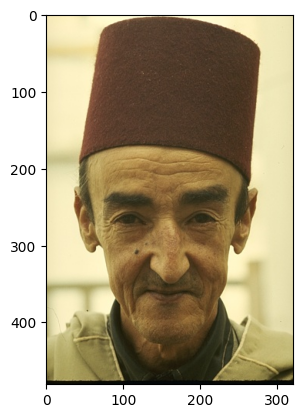

noise_img.shape:  (481, 321, 3)
noise_img.max:  255
noise_img.min:  0


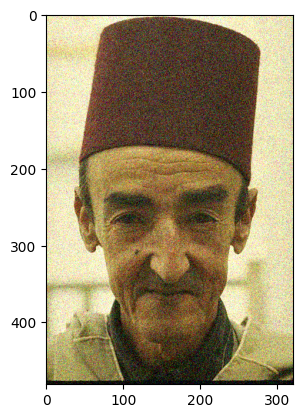

dI.max:  2853.5278999483903
dI.min:  -15.768042915997299
imwei.max:  12.0
imwei.min:  1.0
dI.max:  263.1355418415343
dI.min:  -3.9420107289993247


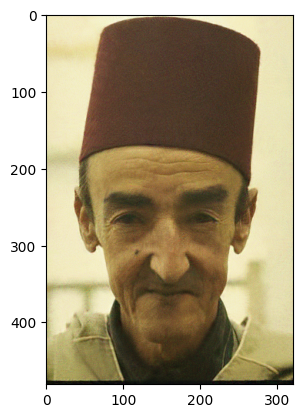

v1:  15.987870906080381
dI2.max:  255.0
dI2.min:  0.0


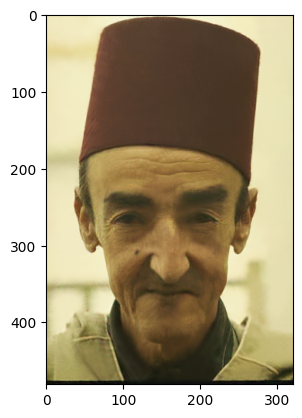

In [ ]:
profile = 'normal'
# profile = 'fast'
std = 25
img_filename = './0038.png'
orig_img = np.array(PIL.Image.open(img_filename))
print("orig_img.shape: ", orig_img.shape)
print("orig_img.max: ", np.max(orig_img))
print("orig_img.min: ", np.min(orig_img))
plt.imshow(orig_img)
plt.show()

seed = 0
random.seed(seed)

# Utilizaremos una imagen que ya tiene
img_filename2 = './0038.png'
noise_img = np.array(PIL.Image.open(img_filename2))
print("noise_img.shape: ", noise_img.shape)
print("noise_img.max: ", np.max(noise_img))
print("noise_img.min: ", np.min(noise_img))
plt.imshow(noise_img)
plt.show()

# plt.imsave('noise_'+img_filename[:-3]+'png', noise_img, cmap='gray')

#The width of the excluded boundaries, set to 20 to get the results in our paper
#bound_exclude_width = 0

#[denoise_img, psnr1, ssim1, psnr2, ssim2] =\
#    LPGPCA_color_denoising(noise_img[0:250, 0:250, :], orig_img[0:250, 0:250, :], std, profile, bound_exclude_width);



denoise_img = LPGPCA_color_denoising(noise_img, orig_img, std, profile)



# plt.imsave('denoised_'+img_filename[:-3]+'png', noise_img, cmap='gray')
# plt.imsave('denoised_'+img_filename[:-3]+'png', denoise_img, cmap='gray')


#plt.imshow(denoise_img/np.max(denoise_img).astype(dtype=float))
#plt.show()


In [ ]:
img_filename = './0038.png'
orig_img = np.array(PIL.Image.open(img_filename))
#orig_img = orig_img[:250, :250, :]
img_filename2 = './0038.png'
noise_img = np.array(PIL.Image.open(img_filename2))
#noise_img = noise_img[:250, :250, :]
denoise1_img = plt.imread('/content/denoised_first.png').astype(dtype=float)
denoise2_img = plt.imread('/content/denoised_second.png').astype(dtype=float)

denoise1_img = denoise1_img[:, :, 0:3]
denoise2_img = denoise2_img[:, :, 0:3]

# Estas imagenes se crean en el drive en el cuadro de c√≥digo anterior
print("denoise1_img.shape: ", denoise1_img.shape)
print("denoise2_img.shape: ", denoise2_img.shape)
psnr_1 = psnr(orig_img/np.max(orig_img), denoise1_img)
ssim_1 = ssim(orig_img/np.max(orig_img), denoise1_img, channel_axis=2)
psnr_2 = psnr(orig_img/np.max(orig_img), denoise2_img)
ssim_2 = ssim(orig_img/np.max(orig_img), denoise2_img, channel_axis=2)

print("psnr1: ", psnr_1)
print("ssim1: ", ssim_1)
print("psnr2: ", psnr_2)
print("ssim2: ", ssim_2)

denoise1_img.shape:  (481, 321, 3)
denoise2_img.shape:  (481, 321, 3)
psnr1:  30.489705972796006
ssim1:  0.8907933718218256
psnr2:  32.215216901693225
ssim2:  0.9388744196892075
